In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
data.shape

(51717, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [6]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [7]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   9809


In [8]:
# drop the duplicates
data.drop_duplicates(inplace=True)

### REMOVING THE NULL VALUE

In [13]:
# check for null values
for column in data.columns:
    print(column, ": ", data[column].isna().sum(), " percentage : ", ((data[column].isna().sum()/data.shape[0])*100).round(2))

name :  0  percentage :  0.0
online_order :  0  percentage :  0.0
book_table :  0  percentage :  0.0
rate :  4252  percentage :  10.15
votes :  0  percentage :  0.0
location :  14  percentage :  0.03
rest_type :  172  percentage :  0.41
dish_liked :  20206  percentage :  48.22
cuisines :  36  percentage :  0.09
approx_cost(for two people) :  253  percentage :  0.6
reviews_list :  0  percentage :  0.0
menu_item :  0  percentage :  0.0
listed_in(type) :  0  percentage :  0.0


### FILLING THE RATE COLUMN AS IT IS IMPORTANT

In [14]:
# check for unique values in the rate column
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
# removed 'NEW' and '-' from rate coloumn and put NaN value.
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

In [16]:
# chcek again data.rate coloumn. we can see nan values.
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
# check for null values
for column in data.columns:
    print(column, ": ", data[column].isna().sum(), " percentage : ", ((data[column].isna().sum()/data.shape[0])*100).round(2))

name :  0  percentage :  0.0
online_order :  0  percentage :  0.0
book_table :  0  percentage :  0.0
rate :  5914  percentage :  14.11
votes :  0  percentage :  0.0
location :  14  percentage :  0.03
rest_type :  172  percentage :  0.41
dish_liked :  20206  percentage :  48.22
cuisines :  36  percentage :  0.09
approx_cost(for two people) :  253  percentage :  0.6
reviews_list :  0  percentage :  0.0
menu_item :  0  percentage :  0.0
listed_in(type) :  0  percentage :  0.0


In [18]:
## apply takes a function and applies it to all values of pandas series.

data['rate'] = data['rate'].astype(str)

## removed all '/5' and replace with ''
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))

## convert rate to float
data['rate'] = data['rate'].apply(lambda r: float(r))

In [20]:
data['rate'].head(2)

0    4.1
1    4.1
Name: rate, dtype: float64

## Using Reviews_list to fill the missing rating

In [21]:
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))
type(data.reviews_list[0])

list

In [22]:
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

In [23]:
# extract the rate for the first input from the review column
extracted = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

In [24]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

In [25]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    
    ## checked give values is text or not, if it is text then removed 'Rated', convert string to float.
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    
    ## return average value
    return round((sum(rate)/len(rate)),1)

In [26]:
# create new column
data['review_rate']  = data.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [28]:
## finding index where rate==NaN and review_rate== not NaN
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate'] 

In [29]:
# update the number of null values now
data.rate.isna().sum()

4861

In [30]:
# drop the review_rate column now
data.drop(columns='review_rate',axis=1,inplace=True)

In [31]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [33]:
# check for null values
for column in data.columns:
    print(column, ": ", data[column].isna().sum(), " percentage : ", ((data[column].isna().sum()/data.shape[0])*100).round(2))

name :  0  percentage :  0.0
online_order :  0  percentage :  0.0
book_table :  0  percentage :  0.0
rate :  0  percentage :  0.0
votes :  0  percentage :  0.0
location :  0  percentage :  0.0
rest_type :  121  percentage :  0.33
dish_liked :  15277  percentage :  41.47
cuisines :  8  percentage :  0.02
approx_cost(for two people) :  0  percentage :  0.0
reviews_list :  0  percentage :  0.0
menu_item :  0  percentage :  0.0
listed_in(type) :  0  percentage :  0.0


In [34]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [35]:
## rename 'approx_cost(for two people)' to 'average_cost'
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [36]:
# check for null values
for column in data.columns:
    print(column, ": ", data[column].isna().sum(), " percentage : ", ((data[column].isna().sum()/data.shape[0])*100).round(2))

name :  0  percentage :  0.0
online_order :  0  percentage :  0.0
book_table :  0  percentage :  0.0
rate :  0  percentage :  0.0
votes :  0  percentage :  0.0
location :  0  percentage :  0.0
rest_type :  121  percentage :  0.33
dish_liked :  15269  percentage :  41.46
cuisines :  0  percentage :  0.0
average_cost :  0  percentage :  0.0
reviews_list :  0  percentage :  0.0
menu_item :  0  percentage :  0.0
listed_in(type) :  0  percentage :  0.0


## FILLING DISHES LIKED

In [37]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [39]:
data.dish_liked[:5]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
Name: dish_liked, dtype: object

In [40]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in data.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

118363

In [43]:
# Now collect the unique dish name 
menu_set = set(menu_list)
len(menu_set)

3507

In [44]:
def clear_text(t):
    return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii',errors='replace')

In [45]:
data['process_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [47]:
data['process_text']

0        RATED\n  A beautiful place to dine in.The inte...
1        RATED\n  Had been here for dinner with family....
2        RATED\n  Ambience is not that good enough and ...
3        RATED\n  Great food and proper Karnataka style...
4        RATED\n  Very good restaurant in neighbourhood...
                               ...                        
51709    RATED\n  Ambience- Big and spacious lawn was u...
51711    RATED\n  A fine place to chill after office ho...
51712    RATED\n  Food and service are incomparably exc...
51715    RATED\n  Nice and friendly place and staff is ...
51716    RATED\n  Great ambience , looking nice good se...
Name: process_text, Length: 36832, dtype: object

In [51]:
data['process_text'] = data.process_text.apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower())

In [52]:
# check part of reviews text for the first restaurant
data.process_text[0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

In [53]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [54]:
# we are using 'menu_set' and 'process_text' data. Put it into liked dishes list.
menu_set.intersection(data.process_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [56]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.process_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))


In [57]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

In [58]:
del menu_list
del menu_set
data.drop(columns=['dish_n_review'],axis=1,inplace=True)

In [59]:
# check for null values
for column in data.columns:
    print(column, ": ", data[column].isna().sum(), " percentage : ", ((data[column].isna().sum()/data.shape[0])*100).round(2))

name :  0  percentage :  0.0
online_order :  0  percentage :  0.0
book_table :  0  percentage :  0.0
rate :  0  percentage :  0.0
votes :  0  percentage :  0.0
location :  0  percentage :  0.0
rest_type :  121  percentage :  0.33
dish_liked :  0  percentage :  0.0
cuisines :  0  percentage :  0.0
average_cost :  0  percentage :  0.0
reviews_list :  0  percentage :  0.0
menu_item :  0  percentage :  0.0
listed_in(type) :  0  percentage :  0.0
process_text :  0  percentage :  0.0


### LITTLE EDA BEFORE TRAINING

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

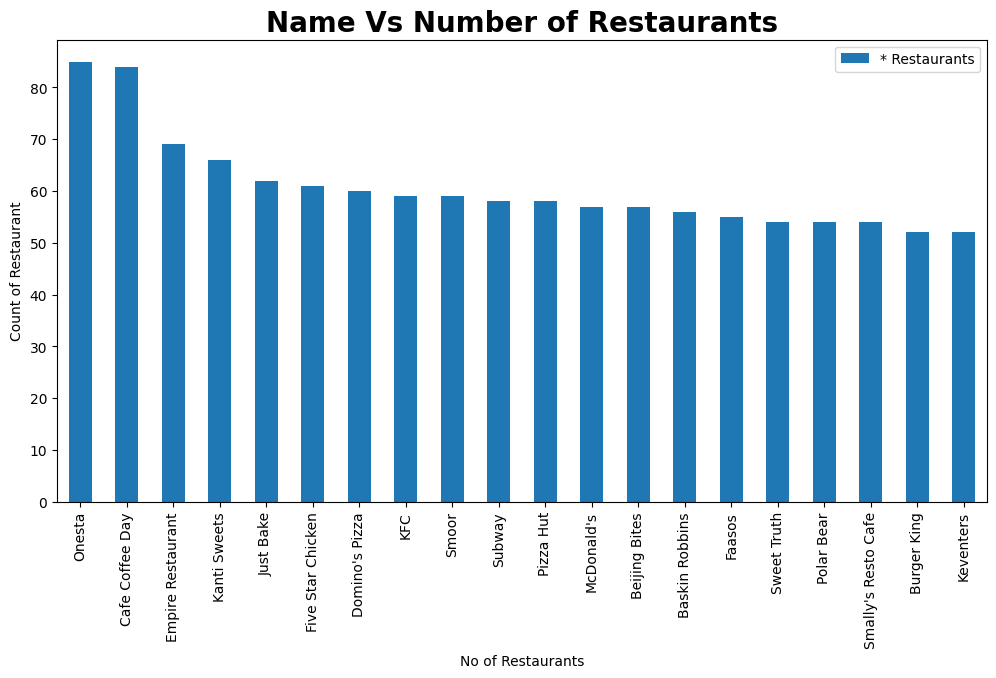

In [60]:
plt.figure(figsize=(12,6))
ax =data.name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

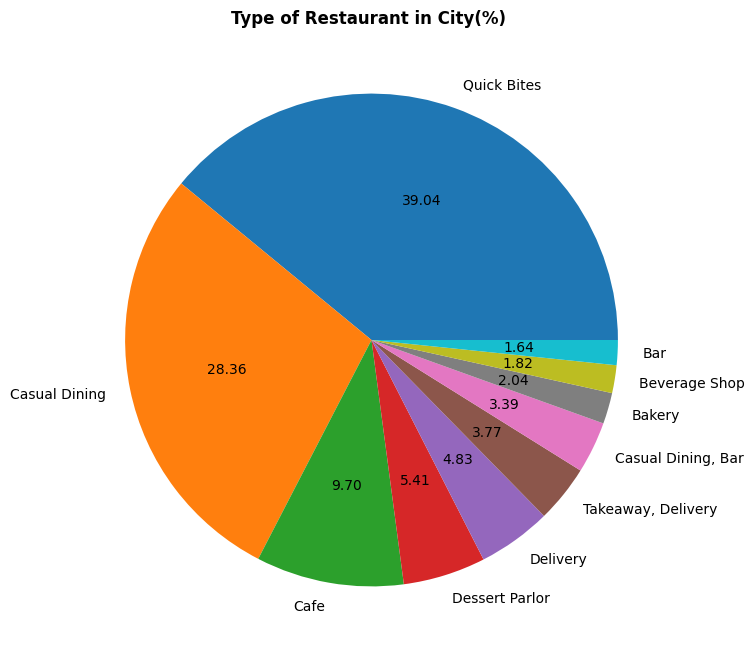

In [62]:
plt.figure(figsize=(8,8))
values = data.rest_type.value_counts()[:10]
labels = data['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

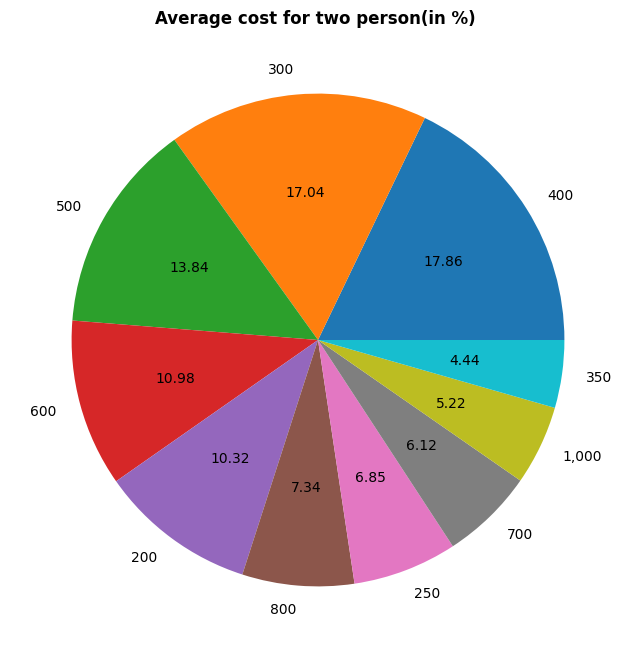

In [63]:
plt.figure(figsize=(8,8))
values = data.average_cost.value_counts()[:10]
labels = data['average_cost'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.show()

In [64]:
data1 = data.copy()

dishes_data = data1[data1.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [65]:
dishes_data.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location             0
rest_type          121
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
process_text         0
dtype: int64

In [66]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

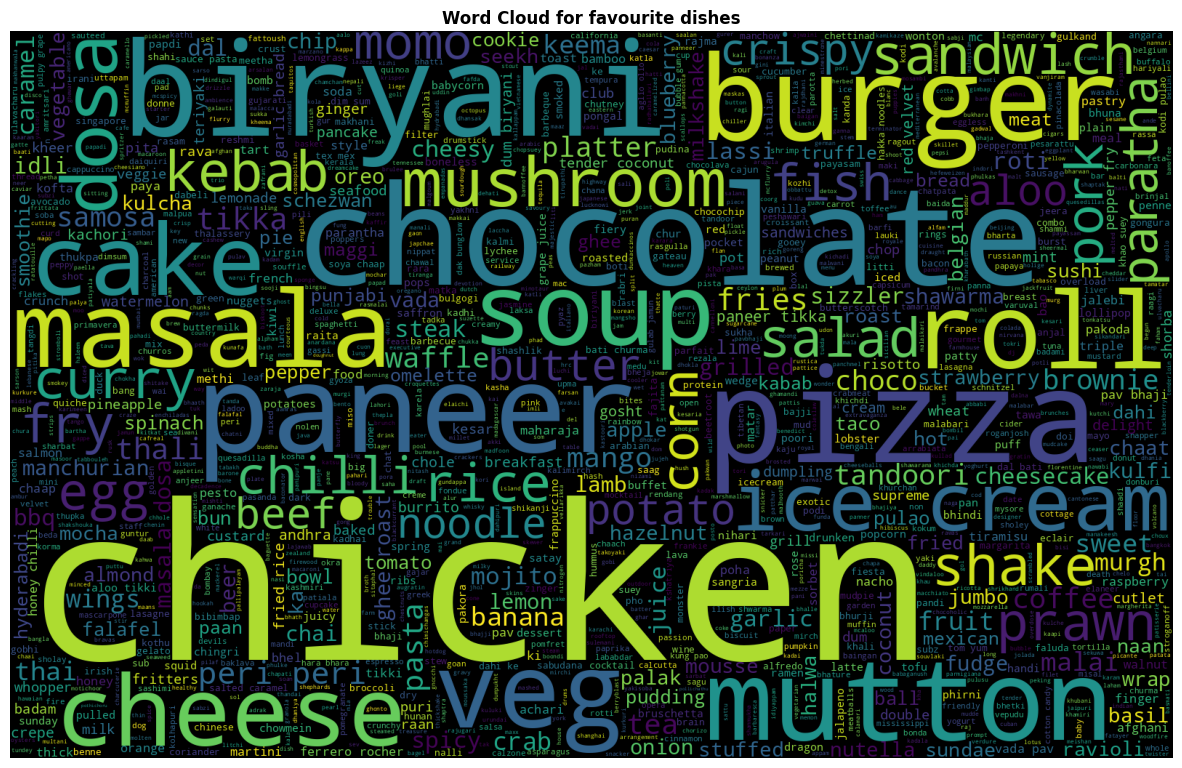

In [67]:
dish_set = set(dish_count)
dish_word_cloud = ', '.join(dish_set)

plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(dish_word_cloud))
wc.generate(dish_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for favourite dishes',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

Text(0, 0.5, 'Count')

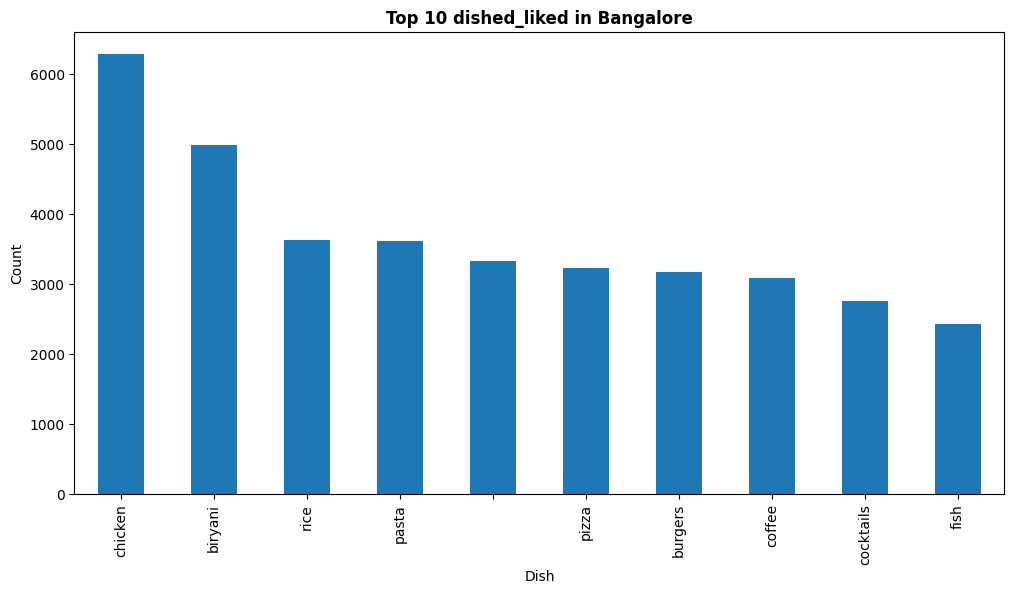

In [68]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

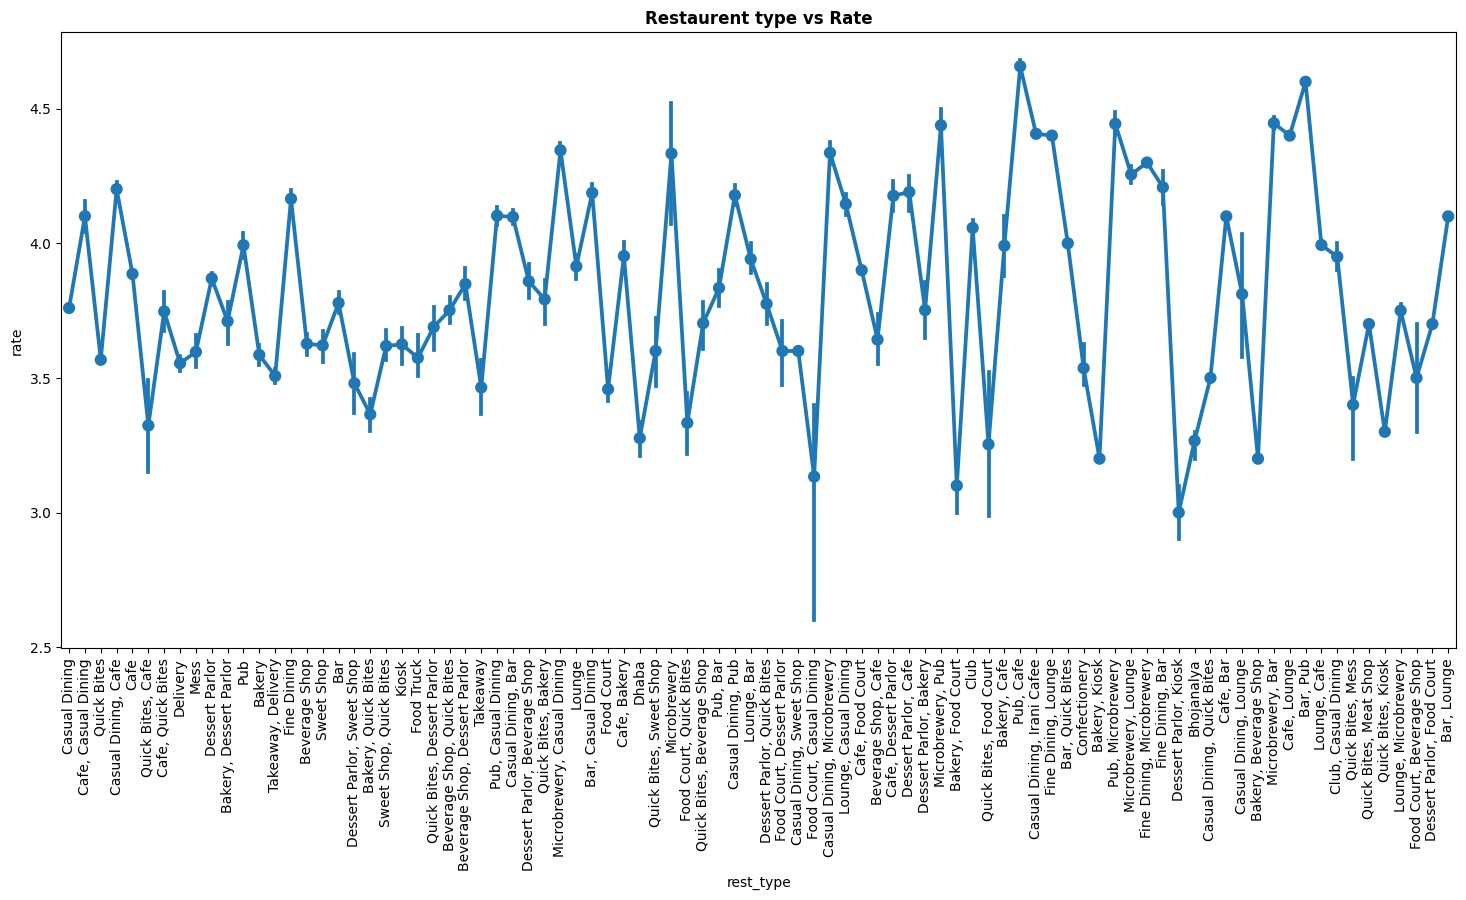

In [69]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

### BUILDING MODEL

In [70]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),process_text
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,a beautiful place to dine in the interiors tak...
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,had been here for dinner with family turned o...
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,great food and proper karnataka style full mea...
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,very good restaurant in neighbourhood buffet ...


In [71]:
# drop redudant columns
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [72]:
# removed ',' between two words; then converted to categorical features
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

rest_type
Bites Quick       12006
Casual Dining      8720
Cafe               2982
Dessert Parlor     1665
Delivery           1486
Name: count, dtype: int64

In [73]:
# removed ',' between two words; then converted to categorical features

data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

cuisines
Chinese Indian North                 1956
Indian North                         1907
Indian South                         1034
Chinese Indian Indian North South     941
Bakery Desserts                       698
Name: count, dtype: int64

In [80]:
# Save DataFrame to CSV
data.to_csv('/kaggle/working/process_data', index=False)

In [164]:
data = pd.read_csv("/kaggle/working/process_data")

Converting Text to usable feature

In [165]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'average_cost', 'process_text'],
      dtype='object')

In [166]:
def clean_and_tokenize(name):
    # Remove non-alphabetic characters and convert to lowercase
    name = re.sub(r'[^a-zA-Z\s]', '', name).lower().strip()
    # Tokenize (split into words)
    tokens = name.split()
    return tokens

# Apply the function
data['cleaned_name'] = data['name'].apply(clean_and_tokenize)

In [167]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,process_text,cleaned_name
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800,a beautiful place to dine in the interiors tak...,[jalsa]
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800,had been here for dinner with family turned o...,"[spice, elephant]"
2,San Churro Cafe,True,False,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800,ambience is not that good enough and it's not ...,"[san, churro, cafe]"
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300,great food and proper karnataka style full mea...,"[addhuri, udupi, bhojana]"
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600,very good restaurant in neighbourhood buffet ...,"[grand, village]"


In [169]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# Rejoin tokens into cleaned names
data['cleaned_name'] = data['cleaned_name'].apply(lambda tokens: ' '.join(tokens))


# Example using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_name'])

dense_tfidf = tfidf_features.toarray()


n_components = 7  # Number of components to reduce to
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(dense_tfidf)


reduced_df = pd.DataFrame(reduced_features, columns=[f'component_{i+1}' for i in range(n_components)])




In [170]:
reduced_df['restaurant_name'] = data['name']

In [171]:
new_df = data

for column in reduced_df.columns:
    new_df[column] = reduced_df[column]

In [172]:
new_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,process_text,cleaned_name,component_1,component_2,component_3,component_4,component_5,component_6,component_7,restaurant_name
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800,a beautiful place to dine in the interiors tak...,jalsa,-0.017949,-0.010056,-0.023214,-0.020232,-0.011755,-0.008140,-0.005776,Jalsa
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800,had been here for dinner with family turned o...,spice elephant,-0.024691,-0.003614,-0.020723,-0.027542,-0.014545,-0.008880,-0.000706,Spice Elephant
2,San Churro Cafe,True,False,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800,ambience is not that good enough and it's not ...,san churro cafe,0.249583,-0.071212,-0.001440,0.008435,0.010013,0.001781,0.000991,San Churro Cafe
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300,great food and proper karnataka style full mea...,addhuri udupi bhojana,-0.017420,-0.015575,-0.028416,-0.030247,-0.020568,0.012292,-0.012885,Addhuri Udupi Bhojana
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600,very good restaurant in neighbourhood buffet ...,grand village,-0.030567,-0.002882,-0.008558,-0.018817,-0.022467,0.063321,0.018341,Grand Village


In [173]:
new_df.drop(['name', 'restaurant_name', 'cleaned_name'], axis = 1, inplace = True)

In [174]:
new_df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,process_text,component_1,component_2,component_3,component_4,component_5,component_6,component_7
0,True,True,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800,a beautiful place to dine in the interiors tak...,-0.017949,-0.010056,-0.023214,-0.020232,-0.011755,-0.008140,-0.005776
1,True,False,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800,had been here for dinner with family turned o...,-0.024691,-0.003614,-0.020723,-0.027542,-0.014545,-0.008880,-0.000706
2,True,False,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800,ambience is not that good enough and it's not ...,0.249583,-0.071212,-0.001440,0.008435,0.010013,0.001781,0.000991
3,False,False,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300,great food and proper karnataka style full mea...,-0.017420,-0.015575,-0.028416,-0.030247,-0.020568,0.012292,-0.012885
4,False,False,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600,very good restaurant in neighbourhood buffet ...,-0.030567,-0.002882,-0.008558,-0.018817,-0.022467,0.063321,0.018341


In [175]:
onl = new_df['online_order']




In [184]:
lst = []

for x in new_df['online_order']:
    if x :
        lst.append(1)
    else:
        lst.append(0)
new_df['online_comp'] = lst
        

In [186]:
lst = []

for x in new_df['book_table']:
    if x :
        lst.append(1)
    else:
        lst.append(0)
new_df['book_comp'] = lst

In [192]:
new_df.head()

,rate,votes,location,rest_type,cuisines,average_cost,component_1,component_2,component_3,component_4,component_5,component_6,component_7,online_comp,book_comp
0,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800,-0.017949,-0.010056,-0.023214,-0.020232,-0.011755,-0.008140,-0.005776,1,1
1,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800,-0.024691,-0.003614,-0.020723,-0.027542,-0.014545,-0.008880,-0.000706,1,0
2,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800,0.249583,-0.071212,-0.001440,0.008435,0.010013,0.001781,0.000991,1,0
3,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300,-0.017420,-0.015575,-0.028416,-0.030247,-0.020568,0.012292,-0.012885,0,0
4,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600,-0.030567,-0.002882,-0.008558,-0.018817,-0.022467,0.063321,0.018341,0,0


In [188]:
new_df.drop(['online_order', 'book_table', 'process_text'], axis = 1, inplace = True)

In [191]:
new_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Marathahalli', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'Domlur', 'Koramangala 8th Block', 'Ejipura',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram',
       'Kammanahalli', 'Koramangala 6th Block', 'Majestic'

In [193]:
new_df['rest_type'].unique()

array(['Casual Dining', 'Cafe Casual Dining', 'Bites Quick', 'Cafe',
       'Bites Cafe Quick', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery Dessert Parlor', 'Pub', 'Bakery', 'Delivery Takeaway',
       'Dining Fine', 'Beverage Shop', 'Shop Sweet', 'Bar',
       'Dessert Parlor Shop Sweet', 'Bakery Bites Quick',
       'Bites Quick Shop Sweet', 'Kiosk', 'Food Truck',
       'Bites Dessert Parlor Quick', 'Beverage Bites Quick Shop',
       'Beverage Dessert Parlor Shop', 'Takeaway', 'Casual Dining Pub',
       'Bar Casual Dining', 'Casual Dining Microbrewery', 'Lounge',
       'Court Food', 'Bakery Cafe', nan, 'Dhaba', 'Microbrewery',
       'Bites Court Food Quick', 'Bar Pub', 'Bar Lounge',
       'Court Dessert Food Parlor', 'Casual Dining Shop Sweet',
       'Casual Court Dining Food', 'Casual Dining Lounge',
       'Cafe Court Food', 'Beverage Cafe Shop', 'Cafe Dessert Parlor',
       'Microbrewery Pub', 'Bakery Court Food', 'Club', 'Cafe Pub',
       'Cafee Casual Dining Ir

In [196]:
len(new_df['cuisines'].unique())

1732

In [197]:
def clean_and_tokenize(name):
    # Remove non-alphabetic characters and convert to lowercase
    name = re.sub(r'[^a-zA-Z\s]', '', name).lower().strip()
    # Tokenize (split into words)
    tokens = name.split()
    return tokens

# Apply the function
new_df['cleaned_cuisines'] = new_df['cuisines'].apply(clean_and_tokenize)

In [200]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# Rejoin tokens into cleaned names
new_df['cleaned_cuisines'] = new_df['cleaned_cuisines'].apply(lambda tokens: ' '.join(tokens))



tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_cuisines'])

dense_tfidf = tfidf_features.toarray()

dense_tfidf.shape





(36832, 112)

In [201]:

n_components = 10  # Number of components to reduce to
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(dense_tfidf)


reduced_df = pd.DataFrame(reduced_features, columns=[f'cusisine_{i+1}' for i in range(n_components)])


In [203]:
for column in reduced_df.columns:
    new_df[column] = reduced_df[column]

In [205]:
new_df.drop(['cuisines'], axis = 1, inplace = True)

In [221]:
new_df = new_df.dropna(subset=['rest_type'])

In [223]:
# Apply the function
new_df['rest_type_clean'] = new_df['rest_type'].apply(clean_and_tokenize)

In [230]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# Rejoin tokens into cleaned names
# new_df['rest_type_clean'] = new_df['rest_type_clean'].apply(lambda tokens: ' '.join(tokens))



tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(new_df['rest_type'])

dense_tfidf = tfidf_features.toarray()

dense_tfidf.shape





(36711, 30)

In [231]:

n_components = 15  # Number of components to reduce to
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(dense_tfidf)


reduced_df = pd.DataFrame(reduced_features, columns=[f'rest_type_{i+1}' for i in range(n_components)])


In [232]:
for column in reduced_df.columns:
    new_df[column] = reduced_df[column]

In [233]:
new_df.head()

,rate,votes,location,rest_type,average_cost,component_1,component_2,component_3,component_4,component_5,...,rest_type_6,rest_type_7,rest_type_8,rest_type_9,rest_type_10,rest_type_11,rest_type_12,rest_type_13,rest_type_14,rest_type_15
0,4.1,775,Banashankari,Casual Dining,800,-0.017949,-0.010056,-0.023214,-0.020232,-0.011755,...,0.017368,0.000853,-0.016920,0.005616,0.000101,-0.000490,-0.001407,-0.006561,-0.003277,0.004413
1,4.1,787,Banashankari,Casual Dining,800,-0.024691,-0.003614,-0.020723,-0.027542,-0.014545,...,0.017368,0.000853,-0.016920,0.005616,0.000101,-0.000490,-0.001407,-0.006561,-0.003277,0.004413
2,3.8,918,Banashankari,Cafe Casual Dining,800,0.249583,-0.071212,-0.001440,0.008435,0.010013,...,-0.074866,-0.030158,-0.056986,-0.030207,-0.001325,-0.027072,-0.014200,-0.023675,-0.016221,-0.039923
3,3.7,88,Banashankari,Bites Quick,300,-0.017420,-0.015575,-0.028416,-0.030247,-0.020568,...,-0.023559,-0.001210,-0.000540,-0.003454,0.000278,0.000261,-0.002489,0.000553,0.000039,0.000230
4,3.8,166,Basavanagudi,Casual Dining,600,-0.030567,-0.002882,-0.008558,-0.018817,-0.022467,...,0.017368,0.000853,-0.016920,0.005616,0.000101,-0.000490,-0.001407,-0.006561,-0.003277,0.004413


In [234]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# Rejoin tokens into cleaned names
# new_df['rest_type_clean'] = new_df['rest_type_clean'].apply(lambda tokens: ' '.join(tokens))



tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(new_df['location'])

dense_tfidf = tfidf_features.toarray()

dense_tfidf.shape

(36711, 109)

In [236]:
reduced_df = pd.DataFrame(dense_tfidf)

In [237]:
for column in reduced_df.columns:
    new_df[column] = reduced_df[column]

In [238]:
new_df.head()

,rate,votes,location,rest_type,average_cost,component_1,component_2,component_3,component_4,component_5,...,99,100,101,102,103,104,105,106,107,108
0,4.1,775,Banashankari,Casual Dining,800,-0.017949,-0.010056,-0.023214,-0.020232,-0.011755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.1,787,Banashankari,Casual Dining,800,-0.024691,-0.003614,-0.020723,-0.027542,-0.014545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8,918,Banashankari,Cafe Casual Dining,800,0.249583,-0.071212,-0.001440,0.008435,0.010013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7,88,Banashankari,Bites Quick,300,-0.017420,-0.015575,-0.028416,-0.030247,-0.020568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.8,166,Basavanagudi,Casual Dining,600,-0.030567,-0.002882,-0.008558,-0.018817,-0.022467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
new_df.drop(['location', 'rest_type'], axis = 1, inplace = True)

In [241]:
new_df.head()

,rate,votes,average_cost,component_1,component_2,component_3,component_4,component_5,component_6,component_7,...,99,100,101,102,103,104,105,106,107,108
0,4.1,775,800,-0.017949,-0.010056,-0.023214,-0.020232,-0.011755,-0.008140,-0.005776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.1,787,800,-0.024691,-0.003614,-0.020723,-0.027542,-0.014545,-0.008880,-0.000706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8,918,800,0.249583,-0.071212,-0.001440,0.008435,0.010013,0.001781,0.000991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7,88,300,-0.017420,-0.015575,-0.028416,-0.030247,-0.020568,0.012292,-0.012885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.8,166,600,-0.030567,-0.002882,-0.008558,-0.018817,-0.022467,0.063321,0.018341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
# Save DataFrame to CSV
new_df.to_csv('/kaggle/working/fin_train', index=False)

In [260]:
new_df.columns = new_df.columns.astype(str)

In [261]:
new_df.shape

(36711, 148)

In [274]:
new_df.drop(['cleaned_cuisines', 'rest_type_clean'], axis = 1, inplace = True)

In [279]:
new_df['cost_int'] = new_df['average_cost'].str.replace(',', '').astype(int)

In [281]:
new_df.drop(['average_cost'], axis = 1, inplace = True)

In [294]:
columns_with_nan = new_df.columns[new_df.isna().any()].tolist()

# Print the names of columns with NaN values
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: ['rest_type_1', 'rest_type_2', 'rest_type_3', 'rest_type_4', 'rest_type_5', 'rest_type_6', 'rest_type_7', 'rest_type_8', 'rest_type_9', 'rest_type_10', 'rest_type_11', 'rest_type_12', 'rest_type_13', 'rest_type_14', 'rest_type_15', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108']


In [308]:
rows_with_nan = new_df.isna().any(axis=1).sum()

# Print the number of rows with NaN values
print("Number of rows with NaN values:", rows_with_nan)

Number of rows with NaN values: 121


In [309]:
new_df = new_df.dropna()

In [310]:
# build x & y dataset
x = new_df.drop(['rate'],axis = 1)
y = new_df['rate']

In [311]:
x.shape

(36590, 145)

In [312]:
y.shape

(36590,)

## Splitting for model training and testing

In [313]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [314]:
# save to local disk
dump(X_train, '/kaggle/working/more_feature_X_train1')
dump(X_test, '/kaggle/working/more_feature_X_test1')
dump(y_train, '/kaggle/working/more_feature_y_train1')
dump(y_test, '/kaggle/working/more_feature_y_test1')

['/kaggle/working/more_feature_y_test1']

In [315]:
X_train = load('/kaggle/working/more_feature_X_train1')
X_test = load('/kaggle/working/more_feature_X_test1')
y_train = load('/kaggle/working/more_feature_y_train1')
y_test = load('/kaggle/working/more_feature_y_test1')

In [316]:
X_train

,votes,component_1,component_2,component_3,component_4,component_5,component_6,component_7,online_comp,book_comp,...,100,101,102,103,104,105,106,107,108,cost_int
32645,1526,-0.023522,-0.013703,-0.026345,-0.029072,-0.019654,0.001148,-0.024779,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500
14056,10,-0.039546,0.044752,-0.049236,-0.086474,0.373810,-0.002093,0.051301,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450
28475,9,-0.020114,-0.011500,-0.026775,-0.024077,-0.014151,-0.010206,-0.007315,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500
21469,166,-0.030358,-0.010376,-0.043537,-0.050149,-0.037443,-0.035936,-0.047791,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600
15663,339,-0.017426,-0.006788,-0.021198,-0.019497,-0.011957,-0.007750,-0.006350,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27942,294,-0.052314,0.040241,-0.122453,0.305704,-0.060908,-0.278187,0.365679,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400
27375,316,0.410774,-0.101477,0.016180,0.025316,0.020057,0.007367,-0.000835,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800
578,70,-0.017329,-0.009653,-0.022225,-0.019213,-0.011112,-0.007614,-0.005391,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100
2448,10,-0.021681,-0.012385,-0.029662,-0.028943,-0.018128,-0.011114,-0.007299,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100


In [317]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

In [318]:
#Purely random

import random

rand_pred= np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(y_test, rand_pred)

2.0812142479730347

In [319]:
object_columns = new_df.select_dtypes(include='object').columns.tolist()

# Print the names of columns of object type
print("Columns of object type:", object_columns)

Columns of object type: []


In [331]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mean_squared_error(y_test, y_pred_lr)

0.16622774367401624

Iteration 1, Training Loss: 0.0341
Iteration 2, Training Loss: 0.0211
Iteration 3, Training Loss: 0.0159
Iteration 4, Training Loss: 0.0128
Iteration 5, Training Loss: 0.0116
Iteration 6, Training Loss: 0.0105
Iteration 7, Training Loss: 0.0097
Iteration 8, Training Loss: 0.0090
Iteration 9, Training Loss: 0.0086
Iteration 10, Training Loss: 0.0083
Iteration 11, Training Loss: 0.0079
Iteration 12, Training Loss: 0.0076
Iteration 13, Training Loss: 0.0074
Iteration 14, Training Loss: 0.0073
Iteration 15, Training Loss: 0.0072
Iteration 16, Training Loss: 0.0071
Iteration 17, Training Loss: 0.0071
Iteration 18, Training Loss: 0.0070
Iteration 19, Training Loss: 0.0069


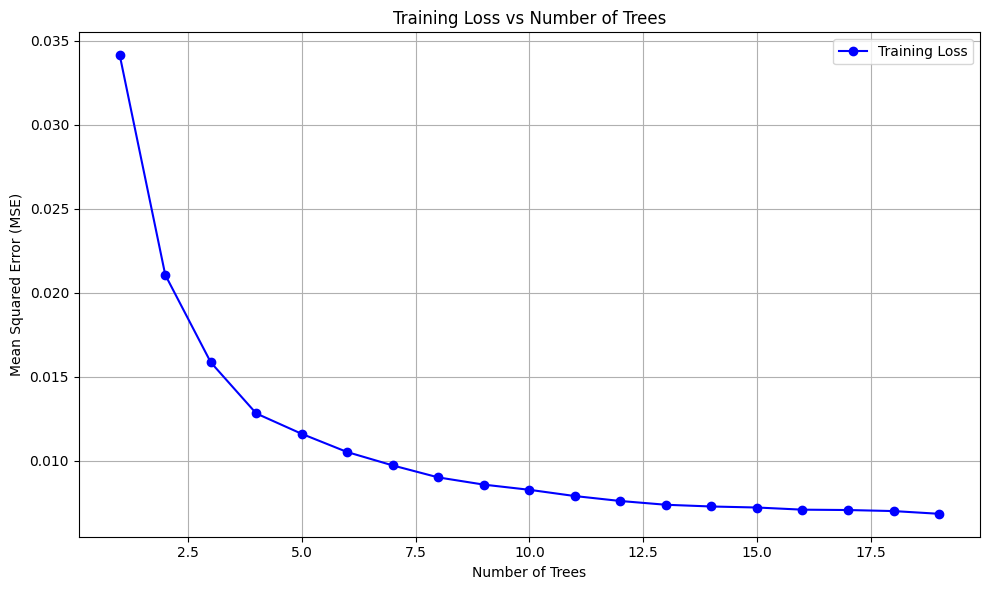

In [332]:
rfr2 = RandomForestRegressor(n_estimators=10, random_state=42)
from sklearn.metrics import mean_squared_error

# Lists to store training losses
train_losses = []

# Fit the model and compute training loss at each iteration
for i in range(1, 20): 
    rfr2.set_params(n_estimators=i)  # Set number of trees
    rfr2.fit(X_train, y_train)
    y_pred_train = rfr2.predict(X_train)
    train_loss = mean_squared_error(y_train, y_pred_train)
    train_losses.append(train_loss)
    print(f"Iteration {i}, Training Loss: {train_loss:.4f}")
    
    
# Plotting the training losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_losses, marker='o', linestyle='-', color='b', label='Training Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss vs Number of Trees')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [333]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


y_pred = rfr2.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")


Mean Absolute Error (MAE): 0.1010
Mean Squared Error (MSE): 0.0452
Root Mean Squared Error (RMSE): 0.2125
R-squared (R2): 0.8112
Mean Absolute Percentage Error (MAPE): 0.0323


In [338]:
# Save the model to a file
import joblib
joblib.dump(rfr2, 'random_forest_model.joblib')

['random_forest_model.joblib']